<a href="https://colab.research.google.com/github/etalab-ia/ami-ia/blob/master/notebooks/ami_ia_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Premiers pas avec Jupyter Notebook et Pandas 

Objectifs: 
  - charger un jeu de données de data.gouv
  - obtenir quelques statistiques basiques sur le jeu de données
  - visualiser les données 
  - nettoyer les données 
  - visualiser des données géo 


  Un exemple avec le jeu de données Alim'Confiance de datagouv à télécharger [ici](https://dgal.opendatasoft.com/explore/dataset/export_alimconfiance/export/?disjunctive.app_libelle_activite_etablissement&disjunctive.filtre&disjunctive.ods_type_activite) 

In [0]:
# importer les librairies dont on aura besoin 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# importer un fichier depuis votre ordinateur local 
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
# lire le jeu de données en un objet "pandas dataframe"
df = pd.read_csv("export_alimconfiance (1).csv", sep = ";", header = 0)

In [33]:
# commande qui permet de visualiser les n premieres lignes d'une dataframe (5 par défaut)
df.head()

,APP_Libelle_etablissement,SIRET,Code_postal,Libelle_commune,Date_inspection,APP_Libelle_activite_etablissement,Synthese_eval_sanit,Agrement,geores,filtre,ods_adresse,ods_type_activite
0,LE COIN DES PATES,53427394100029,13100.0,AIX EN PROVENCE,2019-03-08T12:00:00+01:00,Restaurant,Très satisfaisant,NaN,"43.528259,5.445658",Restaurant,26 PLACE DES TANNEURS,Autres
1,LE GERMINAL,84154265700017,13100.0,AIX EN PROVENCE,2019-03-27T11:00:00+01:00,Restaurant,Très satisfaisant,NaN,"43.523089,5.449838",Restaurant,11 Cours d’Orbitelle,Autres
2,O’GUSTUS,81938616000017,13100.0,AIX EN PROVENCE,2019-04-10T12:30:00+02:00,Restaurant,Très satisfaisant,NaN,"43.529102,5.448918",Restaurant,7 rue des Bouteilles,Autres
3,PHILIPPE FAUR,52857706700028,13100.0,AIX EN PROVENCE,2019-03-27T15:30:00+01:00,Glacier,Très satisfaisant,NaN,"43.529423,5.447682",Glacier,7 rue Marechal Foch,Autres
4,EL PRIMO,51947414200014,13100.0,AIX EN PROVENCE,2019-03-08T12:30:00+01:00,Restaurant,Très satisfaisant,NaN,"43.528073,5.445415",Restaurant,1 RUE BRUYES,Autres


In [29]:
# donne le (nb de lignes, nb de colonnes)
df.shape

(42932, 12)

In [37]:
# regarder le type des variables
df.dtypes

APP_Libelle_etablissement              object
SIRET                                  object
Code_postal                           float64
Libelle_commune                        object
Date_inspection                        object
APP_Libelle_activite_etablissement     object
Synthese_eval_sanit                    object
Agrement                               object
geores                                 object
filtre                                 object
ods_adresse                            object
ods_type_activite                      object
dtype: object

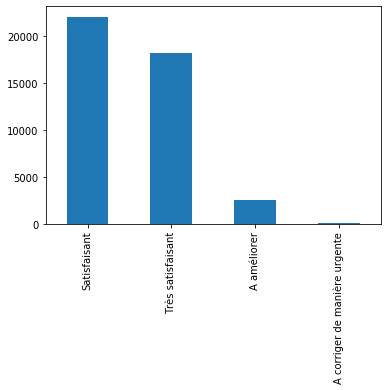

In [31]:
df['Synthese_eval_sanit'].value_counts().plot(kind='bar')

In [73]:
df["APP_Libelle_activite_etablissement"].value_counts().head(10)

Restaurant                                               16227
Restauration collective                                   7461
Producteur fermier                                        2031
Transformation de lait ou produits laitiers               1556
Boucherie-Charcuterie                                     1358
Transformation de produits carnés                         1247
Boulangerie-Pâtisserie                                    1169
Alimentation générale                                     1052
Chaîne d'abattage de volaille/lagomorphe/petit gibier     1000
Purification/Expédition de coquillages                     969
Name: APP_Libelle_activite_etablissement, dtype: int64

In [38]:
# créer une variable latitude et longitude à partir de la colonne geo res
set(type(x) for x in df["geores"].values.tolist())

{float, str}

In [0]:
df["lat"] = df["geores"].map(lambda x: float(x.split(",")[0] if pd.isnull(x)==False else x))
df["long"] = df["geores"].map(lambda x: float(x.split(",")[1] if pd.isnull(x)==False else x))

In [0]:
geo_df = df.dropna(subset =["lat", "long"])

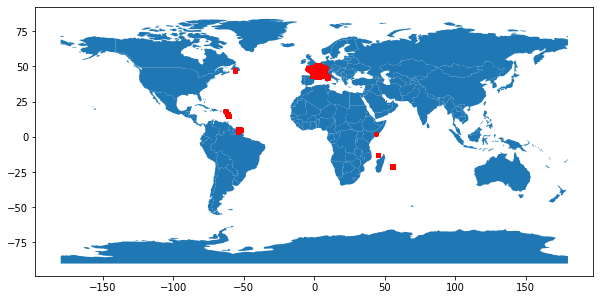

In [60]:
from shapely.geometry import Point
#!pip install geopandas
import geopandas as gpd
from geopandas import GeoDataFrame


geometry = [Point(xy) for xy in zip(geo_df['long'], geo_df['lat'])]
gdf = GeoDataFrame(geo_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)
plt.title("Répartition des restaurants notés ")

In [0]:
geo_df_fr = geo_df[(geo_df.lat>41.12)&(geo_df.lat<51.84)&(geo_df.long<11.3)&(geo_df.long>-6.25)]

Text(0.5, 1, 'Répartition des notes sanitaires sur le territoire')

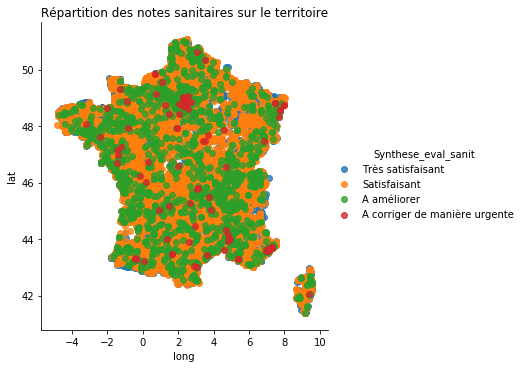

In [71]:
sns.lmplot('long', 'lat', data=geo_df_fr, hue='Synthese_eval_sanit', fit_reg=False)
plt.title("Répartition des notes sanitaires sur le territoire")